In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/clean_eeg.csv", parse_dates=["timestamp"])

In [4]:
df.head()

,subject_id,session_id,segment_idx,timestamp,alpha_power,beta_power,theta_power,gamma_power
0,S001,U8KXB4N9,0,2025-04-01 14:00:00,1.5964,0.9354,1.3620,0.9980
1,S001,U8KXB4N9,1,2025-04-01 14:00:10,0.9799,0.9322,1.4147,0.7717
2,S001,U8KXB4N9,2,2025-04-01 14:00:20,1.4633,0.7045,1.6506,1.0507
3,S001,U8KXB4N9,4,2025-04-01 14:00:40,1.1389,0.8947,0.8671,0.2875
4,S001,U8KXB4N9,6,2025-04-01 14:01:00,1.3752,0.8834,1.1537,0.5461


In [5]:
df[["alpha_power","beta_power","theta_power","gamma_power"]].describe()


,alpha_power,beta_power,theta_power,gamma_power
count,4126.000000,4126.000000,4126.000000,4126.000000
mean,1.078646,1.032024,1.318913,0.800280
std,0.298238,0.272513,0.344995,0.253651
min,0.385300,0.367900,0.493100,0.245100
25%,0.864625,0.843250,1.068700,0.618500
50%,1.032300,0.998800,1.270850,0.767400
75%,1.248050,1.189225,1.513225,0.945300
max,2.877700,2.711000,3.120900,2.197800


In [6]:
#select the band features
features = ["alpha_power", "beta_power", "theta_power", "gamma_power"]

In [8]:
X = df[features]
print(X)

      alpha_power  beta_power  theta_power  gamma_power
0          1.5964      0.9354       1.3620       0.9980
1          0.9799      0.9322       1.4147       0.7717
2          1.4633      0.7045       1.6506       1.0507
3          1.1389      0.8947       0.8671       0.2875
4          1.3752      0.8834       1.1537       0.5461
...           ...         ...          ...          ...
4121       1.1140      0.8469       1.0869       0.5069
4122       1.1486      1.0007       1.9703       0.7803
4123       0.8687      1.8601       0.9551       0.6675
4124       0.8737      0.5636       0.8298       0.6290
4125       1.3275      1.1194       1.5014       0.5386

[4126 rows x 4 columns]


In [9]:
# Standardize for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [11]:
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.27058364 0.25877553]


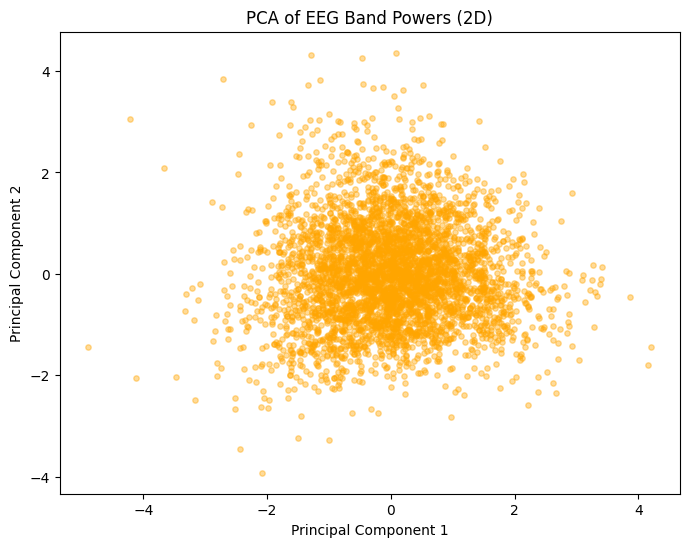

In [12]:
#cluster visual
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.4, s=15, c="orange")
plt.title("PCA of EEG Band Powers (2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

In [14]:
#shows how much each band contributes to pc1 and pc2
pd.DataFrame(
    pca.components_,
    columns=["alpha_power", "beta_power", "theta_power", "gamma_power"],
    index=["PC1", "PC2"]
)


,alpha_power,beta_power,theta_power,gamma_power
PC1,0.685331,-0.535279,-0.198483,-0.452109
PC2,-0.208328,-0.527820,0.821789,-0.051655


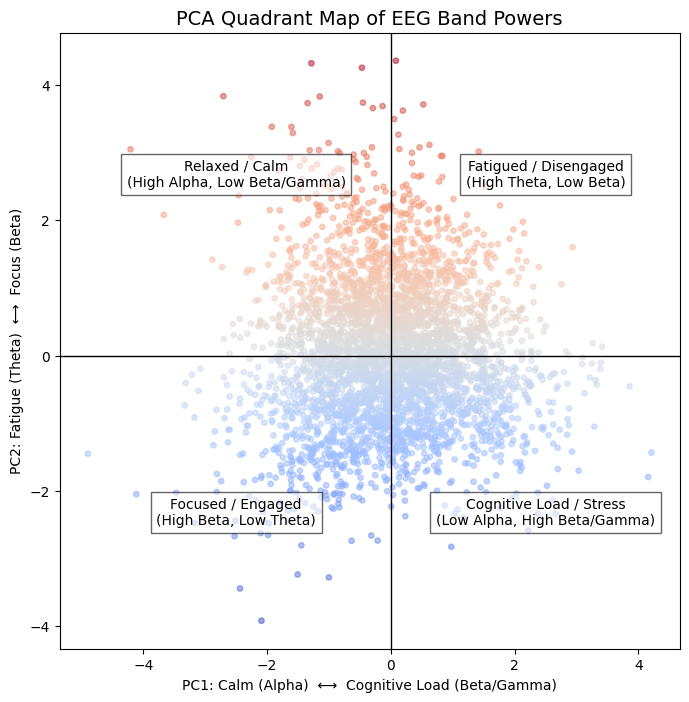

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

# Scatter plot
plt.scatter(X_pca[:,0], X_pca[:,1], c=X_pca[:,1], cmap="coolwarm", alpha=0.5, s=15)

# Add quadrant lines
plt.axhline(0, color="black", linewidth=1)
plt.axvline(0, color="black", linewidth=1)

# Labels for quadrants
plt.text(2.5, 2.5, "Fatigued / Disengaged\n(High Theta, Low Beta)", 
         fontsize=10, ha="center", bbox=dict(facecolor="white", alpha=0.6))

plt.text(-2.5, 2.5, "Relaxed / Calm\n(High Alpha, Low Beta/Gamma)", 
         fontsize=10, ha="center", bbox=dict(facecolor="white", alpha=0.6))

plt.text(-2.5, -2.5, "Focused / Engaged\n(High Beta, Low Theta)", 
         fontsize=10, ha="center", bbox=dict(facecolor="white", alpha=0.6))

plt.text(2.5, -2.5, "Cognitive Load / Stress\n(Low Alpha, High Beta/Gamma)", 
         fontsize=10, ha="center", bbox=dict(facecolor="white", alpha=0.6))

# Titles and axes
plt.title("PCA Quadrant Map of EEG Band Powers", fontsize=14)
plt.xlabel("PC1: Calm (Alpha)  ⟷  Cognitive Load (Beta/Gamma)")
plt.ylabel("PC2: Fatigue (Theta)  ⟷  Focus (Beta)")

plt.show()
